In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Thu, 30 Nov 2023 14:15


In [3]:
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format
relative_path = '../../../../outputs'

# Commute Mode by Workplace Geography

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_workplace_geog.csv'))

# Add mode share by work_place field
_df = df.groupby('work_place').sum()[['modeled','observed']].reset_index()
_df = _df.merge(df, on='work_place', suffixes=['_geog_total','_mode_total'])
_df['observed_mode_share'] = _df['observed_mode_total']/_df['observed_geog_total']
_df['modeled_mode_share'] = _df['modeled_mode_total']/_df['modeled_geog_total']
_df[['work_place','mode','modeled_mode_total','observed_mode_total','percent_diff','diff','modeled_mode_share','observed_mode_share']]

,work_place,mode,modeled_mode_total,observed_mode_total,percent_diff,diff,modeled_mode_share,observed_mode_share
0,Auburn,auto,"37,558.00",33431,0.12,"4,127.00",0.95,0.94
1,Auburn,transit,"1,401.00",691,1.03,710.00,0.04,0.02
2,Auburn,walk_and_bike,571.00,1355,-0.58,-784.00,0.01,0.04
3,Bellevue,auto,"102,206.00",96761,0.06,"5,445.00",0.89,0.84
4,Bellevue,transit,"6,353.00",12505,-0.49,"-6,152.00",0.06,0.11
5,Bellevue,walk_and_bike,"6,215.00",6464,-0.04,-249.00,0.05,0.06
6,Everett,auto,"66,549.00",81741,-0.19,"-15,192.00",0.94,0.92
7,Everett,transit,"1,477.00",2766,-0.47,"-1,289.00",0.02,0.03
8,Everett,walk_and_bike,"2,507.00",3961,-0.37,"-1,454.00",0.04,0.04
9,Federal Way,auto,"21,653.00",27590,-0.22,"-5,937.00",0.95,0.93


r^2 : 0.953212998156858


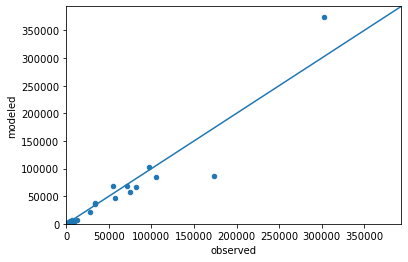

In [5]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Commute Mode Shares by Work Place
----

In [6]:
df_tot = df.groupby(['work_place']).sum()[['modeled','observed']].reset_index()
df_shares = df.merge(df_tot, on='work_place', suffixes=['','_total'])
df_shares['mode_share_modeled'] = df_shares['modeled']/df_shares['modeled_total']
df_shares['mode_share_observed'] = df_shares['observed']/df_shares['observed_total']
df_shares.rename(columns={'mode_share_modeled': 'modeled', 'mode_share_observed': 'observed',
                         'modeled': '_', 'observed': '__'}, inplace=True)
df_shares = df_shares[['work_place','modeled','observed','mode']]
df_shares['percent_diff'] = (df_shares['modeled']-df_shares['observed'])/df_shares['observed']
df_shares['diff'] = df_shares['modeled']-df_shares['observed']

## Auto

In [7]:
_df = df_shares[df_shares['mode'] == 'auto']
_df

,work_place,modeled,observed,mode,percent_diff,diff
0,Auburn,0.95,0.94,auto,0.01,0.01
3,Bellevue,0.89,0.84,auto,0.07,0.05
6,Everett,0.94,0.92,auto,0.02,0.02
9,Federal Way,0.95,0.93,auto,0.01,0.01
12,Kent,0.95,0.92,auto,0.03,0.03
15,Kirkland,0.94,0.87,auto,0.09,0.07
18,Redmond,0.93,0.85,auto,0.10,0.08
21,Renton,0.94,0.91,auto,0.03,0.03
24,Seattle,0.72,0.55,auto,0.31,0.17
27,Tacoma,0.92,0.94,auto,-0.01,-0.01


r^2 : 0.9700360594928196


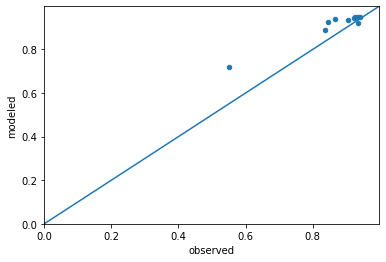

In [8]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print('r^2 : ' + str(r_value))

## Transit

In [9]:
_df = df_shares[df_shares['mode'] == 'transit']
_df

,work_place,modeled,observed,mode,percent_diff,diff
1,Auburn,0.04,0.02,transit,0.82,0.02
4,Bellevue,0.06,0.11,transit,-0.49,-0.05
7,Everett,0.02,0.03,transit,-0.33,-0.01
10,Federal Way,0.03,0.00,transit,6.50,0.02
13,Kent,0.04,0.05,transit,-0.22,-0.01
16,Kirkland,0.03,0.09,transit,-0.69,-0.06
19,Redmond,0.05,0.11,transit,-0.57,-0.06
22,Renton,0.04,0.04,transit,0.02,0.00
25,Seattle,0.17,0.32,transit,-0.47,-0.15
28,Tacoma,0.03,0.03,transit,-0.02,-0.00


r^2 : 0.9507882353971542


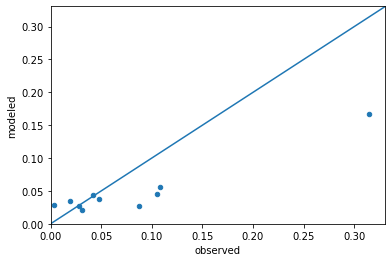

In [10]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print('r^2 : ' + str(r_value))

## Walk and Bike

In [11]:
_df = df_shares[df_shares['mode'] == 'walk_and_bike']
_df

,work_place,modeled,observed,mode,percent_diff,diff
2,Auburn,0.01,0.04,walk_and_bike,-0.62,-0.02
5,Bellevue,0.05,0.06,walk_and_bike,-0.03,-0.00
8,Everett,0.04,0.04,walk_and_bike,-0.21,-0.01
11,Federal Way,0.02,0.06,walk_and_bike,-0.60,-0.04
14,Kent,0.01,0.03,walk_and_bike,-0.54,-0.01
17,Kirkland,0.03,0.05,walk_and_bike,-0.32,-0.01
20,Redmond,0.03,0.05,walk_and_bike,-0.42,-0.02
23,Renton,0.02,0.05,walk_and_bike,-0.60,-0.03
26,Seattle,0.11,0.14,walk_and_bike,-0.18,-0.02
29,Tacoma,0.05,0.03,walk_and_bike,0.41,0.01


r^2 : 0.8723706364661153


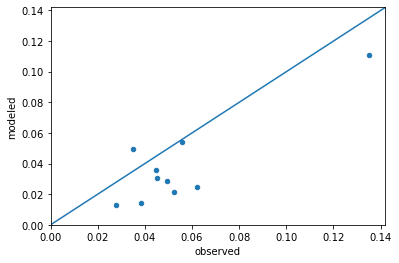

In [12]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print('r^2 : ' + str(r_value))

# Commute Mode Share by Home Tract
----

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))
pd.options.display.float_format = '{:0,.0f}'.format

In [23]:
df_county = df.groupby('CountyName').sum()[['modeled','observed']].reset_index()
df_total = df[['modeled','observed']].assign(CountyName='Total').groupby('CountyName').sum().reset_index()
pd.concat([df_county, df_total], ignore_index=True)

,CountyName,modeled,observed
0,King,"1,120,411","1,024,132"
1,Kitsap,"68,036","105,559"
2,Pierce,"228,741","358,689"
3,Snohomish,"208,883","351,217"
4,Total,"1,626,071","1,839,597"


In [26]:
df_county = df.groupby(['CountyName','subarea_flag']).sum()[['modeled','observed']].reset_index()
df_county['CountyGroup'] = np.where(df_county['subarea_flag']==1,'City of SeaTac','Other')
df_seatac = df_county.groupby('CountyGroup').sum()[['modeled', 'observed']].reset_index()
df_seatac

,CountyGroup,modeled,observed
0,City of SeaTac,"40,839","35,564"
1,Other,"1,585,232","1,804,033"


In [27]:
def calculate_shares(df, geog_col, apply_format=False):
    
    df[['modeled','observed']] = df[['modeled','observed']].astype('int')
    df_total = df.groupby(geog_col).sum()[['modeled','observed']].reset_index()
    df_total.rename(columns={'modeled': 'modeled_total','observed':'observed_total'}, inplace=True)
    df = df.merge(df_total, on=geog_col, how='left')
    df['modeled_share'] = df['modeled']*1.0/df['modeled_total']
    df['observed_share'] = df['observed']*1.0/df['observed_total']
    if apply_format:
        df[['modeled_share','observed_share']] = df[['modeled_share','observed_share']].applymap(format_percent)
    
    return df

In [28]:
df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

## SOV

 r^2: 0.6204223602406296


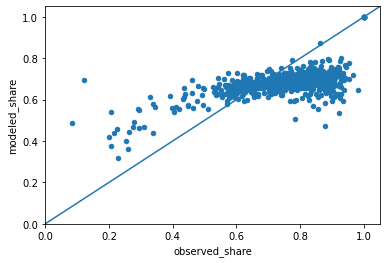

In [29]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## HOV

 r^2: 0.4437532086765656


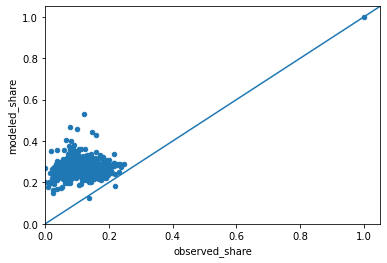

In [30]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Transit

 r^2: 0.6008144824009939


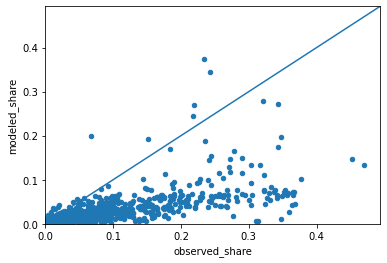

In [31]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Walk

 r^2: 0.7306831715034777


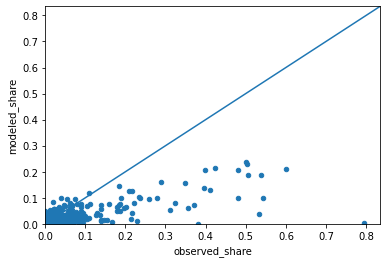

In [32]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

# Commute Mode Share by Home Tract - City of SeaTac

In [33]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))
df = df[df['subarea_flag'] == 1]

df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

In [34]:
df_county_mode

,CountyName,mode,modeled,observed,modeled_total,observed_total,modeled_share,observed_share
0,King,HOV,10624,4163,40839,35564,26.01%,11.71%
1,King,SOV,26766,26281,40839,35564,65.54%,73.90%
2,King,Transit,3071,4022,40839,35564,7.52%,11.31%
3,King,Walk,378,1098,40839,35564,0.93%,3.09%


## SOV

 r^2: 0.30236930312024307


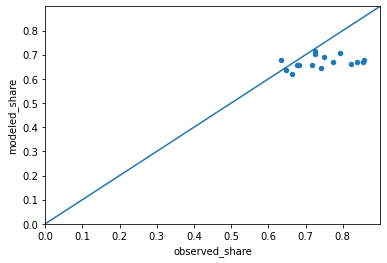

In [35]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## HOV

 r^2: -0.018297887955055176


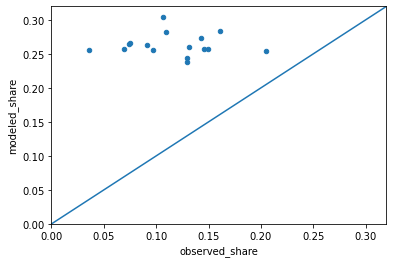

In [36]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Transit

 r^2: 0.5902507508850633


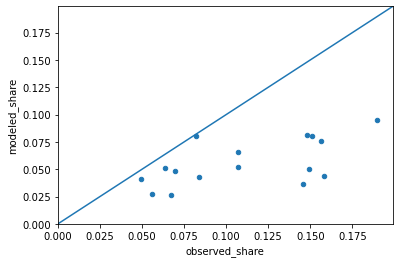

In [37]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Walk

 r^2: -0.19689585793490325


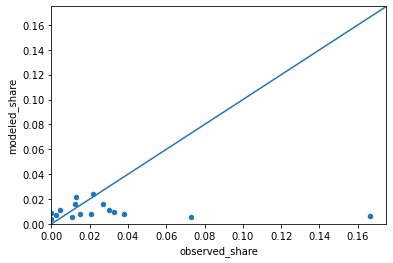

In [38]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

# Commute Mode Share by Home Tract - Other

In [39]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))
df = df[df['subarea_flag'] != 1]

df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

In [40]:
df_county_mode

,CountyName,mode,modeled,observed,modeled_total,observed_total,modeled_share,observed_share
0,King,HOV,258794,101571,1079572,988568,23.97%,10.27%
1,King,SOV,653272,681987,1079572,988568,60.51%,68.99%
2,King,Transit,109712,145765,1079572,988568,10.16%,14.75%
3,King,Walk,57794,59245,1079572,988568,5.35%,5.99%
4,Kitsap,HOV,18250,9400,68036,105559,26.82%,8.90%
5,Kitsap,SOV,46695,81227,68036,105559,68.63%,76.95%
6,Kitsap,Transit,1387,9030,68036,105559,2.04%,8.55%
7,Kitsap,Walk,1704,5902,68036,105559,2.50%,5.59%
8,Pierce,HOV,63586,37249,228741,358689,27.80%,10.38%
9,Pierce,SOV,156150,302209,228741,358689,68.26%,84.25%


## SOV

 r^2: 0.6217052973876738


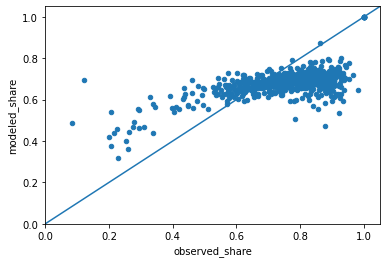

In [41]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## HOV

 r^2: 0.4478464712292484


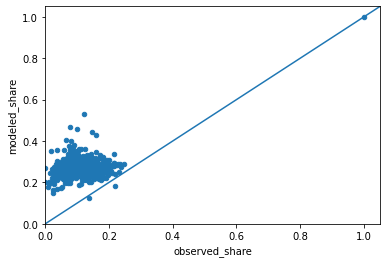

In [42]:
# Show only HOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Transit

 r^2: 0.6030408388065912


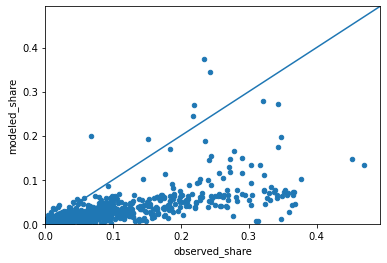

In [43]:
# Show only Transit
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Walk

 r^2: 0.7331930676599397


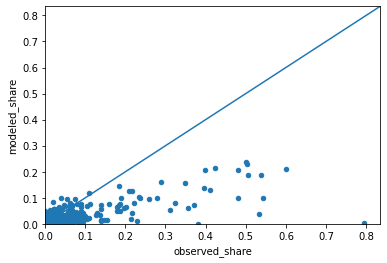

In [44]:
# Show only Walk
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))